# Data Analysis Project: Air Quality Dataset
- **Nama:** Muhammad Hafizh Dzaki
- **Email:** muhammadhafizhdzaki@gmail.com
- **ID Dicoding:** haztsu

## Determine Business Questions

- How the average monthly pollutant change in particular year at particular station name?
    - E.g. : How the average monthly pollutant change in 2014 at Changping Station?
- What is the correlation between temperature change and CO pollutant at particular station name in particular year?
    - E.g. : What is the correlation between temperature change and CO pollutant at particular Gucheng Station in 2015?
- How does wind direction affect pollutants at particular station name in particular year?
    - E.g. : How does wind direction affect pollutants at particular Aotizhongxin Station in 2013?
- How does average pollutant concentration by time of day at particular station name in particular year?
    - E.g. : How does average pollutant concentration by time of day at particular Aotizhongxin Station in 2014?

## Import Package that Needed

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Data Gathering 

In [2]:
final_df = pd.DataFrame()               # Initialize a Dataframe

ds = os.listdir('./dataset')[-1]        #
df1 = pd.read_csv(f'./dataset/{ds}')    # Read 1 dataset, then takes the column names
kolom1 = df1.columns.tolist()           #

for file in os.listdir('./dataset'):            # Looping through dataset directory
    if file.startswith('PRSA'):
        df2 = pd.read_csv(f'./dataset/{file}')  # Read every dataset
        kolom2 = df2.columns.tolist()           # Take column names for every loop-ed dataset
        if kolom1 != kolom2:                    # Check every dataset, do they have same columns name?
            print('Ada kolom yang tidak sama!') # 
            break                               #
        final_df = pd.concat([final_df, df2], ignore_index=True) # Create 1 big dataset

# final_df.to_csv('./dataset/mainDataset.csv', index=False) # Save that 1 big dataset

**Insight:**
- In the Air Quality Dataset, there are 12 datasets that have been separated by station.
- All 12 datasets have the same column names.
- To facilitate analysis, this project will merge the 12 datasets into 1 large dataset that contains all the information.

### Data Assessing

In [3]:
final_df.info() # View dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [4]:
final_df.describe(include='all').round(2) # View dataset description

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.00,420768.00,420768.00,420768.00,420768.00,412029.00,414319.00,411747.00,408652.00,400067.00,407491.00,420370.00,420375.00,420365.00,420378.00,418946,420450.00,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.50,2014.66,6.52,15.73,11.50,79.79,104.60,15.83,50.64,1230.77,57.37,13.54,1010.75,2.49,0.06,NaN,1.73,NaN
std,10122.12,1.18,3.45,8.80,6.92,80.82,91.77,21.65,35.13,1160.18,56.66,11.44,10.47,13.79,0.82,NaN,1.25,NaN
min,1.00,2013.00,1.00,1.00,0.00,2.00,2.00,0.29,1.03,100.00,0.21,-19.90,982.40,-43.40,0.00,NaN,0.00,NaN
25%,8766.75,2014.00,4.00,8.00,5.75,20.00,36.00,3.00,23.00,500.00,11.00,3.10,1002.30,-8.90,0.00,NaN,0.90,NaN
50%,17532.50,2015.00,7.00,16.00,11.50,55.00,82.00,7.00,43.00,900.00,45.00,14.50,1010.40,3.10,0.00,NaN,1.40,NaN
75%,26298.25,2016.00,10.00,23.00,17.25,111.00,145.00,20.00,71.00,1500.00,82.00,23.30,1019.00,15.10,0.00,NaN,2.20,NaN


In [5]:
print(f'Number of null data : {final_df.isna().sum().sum()}')
print(f'Number of duplicated data : {final_df.duplicated().sum()}')

Number of null data : 74027
Number of duplicated data : 0


In [6]:
print(f'Data count for wind direction :\n {final_df["wd"].value_counts()}')
# NE : NorthEast (Wind that blows from NorthEast to SouthWest)
# ENE : East-NorthEast (Wind that blows from around East and NorthEast to around SouthWest)

Data count for wind direction :
 wd
NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64


In [7]:
print(f'Data count for station name :\n {final_df["station"].value_counts()}')

Data count for station name :
 station
Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: count, dtype: int64


**Insight:**
- Judging from the information, the dataset features are dominated by continuous numeric numbers.
- Judging from the description, the dataset features are still fairly reasonable, such as:
    - day = min : 1 | max : 31.
    - temperature = min: -19.90 | max: 41 (still reasonable for the China region).
- Number of null data: 74027.
- Number of duplicated data: 0.
- From the naming of wind directions is still OK.
- From the naming of train station is still OK.
- Because Author does not have domain knowledge about weather, the author considers the values in the Dataset all important.

### Cleaning Data

In [8]:
clean_df = final_df.copy()      # Create copy from final_df
clean_df.dropna(inplace=True)   # Remove empty data

print(f'Number of null data : {clean_df.isna().sum().sum()}') # View the empty data after being cleaned

Number of null data : 0


In [9]:
clean_df.drop('No', axis=1, inplace=True) # Remove unnecessary column

In [10]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382168 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     382168 non-null  int64  
 1   month    382168 non-null  int64  
 2   day      382168 non-null  int64  
 3   hour     382168 non-null  int64  
 4   PM2.5    382168 non-null  float64
 5   PM10     382168 non-null  float64
 6   SO2      382168 non-null  float64
 7   NO2      382168 non-null  float64
 8   CO       382168 non-null  float64
 9   O3       382168 non-null  float64
 10  TEMP     382168 non-null  float64
 11  PRES     382168 non-null  float64
 12  DEWP     382168 non-null  float64
 13  RAIN     382168 non-null  float64
 14  wd       382168 non-null  object 
 15  WSPM     382168 non-null  float64
 16  station  382168 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 52.5+ MB


In [11]:
print(f'Data count for station name :\n {clean_df["station"].value_counts().sort_values()}')
#  View station name after being cleaned

Data count for station name :
 station
Shunyi           30194
Dongsi           30338
Wanliu           30634
Dingling         31306
Huairou          31708
Aotizhongxin     31815
Guanyuan         32263
Gucheng          32504
Changping        32681
Wanshouxigong    32768
Tiantan          32843
Nongzhanguan     33114
Name: count, dtype: int64


**Insight:**
- The 'No' column can be removed because it is just a unique ID identifier. Has no meaningful information.
- After cleaning, there are 382168 rows of data.
- After cleaning, Shunyi Station has the least amount of data and Nongzhanguan Station has the most amount of data

In [12]:
# clean_df.to_csv('./dataset/cleanMainDataset.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
clean_df.sample(10) # Melihat 10 data dataset agar bisa memahami strukturnya

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
338315,2015,10,4,11,82.0,120.0,11.0,93.0,1400.0,17.0,19.7,1020.0,12.0,0.0,E,1.1,Tiantan
155742,2014,12,6,6,30.0,30.0,39.0,76.0,1200.0,2.0,-4.9,1022.0,-14.5,0.0,NE,2.4,Guanyuan
320675,2013,9,29,11,147.0,157.0,46.0,89.0,2500.0,12.0,18.9,1014.9,14.6,0.0,N,1.6,Tiantan
204407,2016,6,24,23,9.0,17.0,2.0,15.0,200.0,103.0,26.7,999.9,4.4,0.0,NNW,3.2,Gucheng
1308,2013,4,24,12,81.0,88.0,23.0,70.0,900.0,44.0,23.0,1002.5,-1.2,0.0,W,4.4,Aotizhongxin
401559,2014,12,21,15,18.0,46.0,12.0,23.0,500.0,52.0,2.7,1023.0,-18.1,0.0,NW,5.7,Wanshouxigong
306675,2016,2,24,3,25.0,25.0,9.0,37.0,700.0,35.0,-5.4,1034.7,-19.2,0.0,WNW,1.4,Shunyi
414659,2016,6,19,11,80.0,117.0,6.0,33.0,900.0,229.0,30.6,1001.2,16.2,0.0,NE,1.5,Wanshouxigong
4125,2013,8,19,21,27.0,48.0,7.0,53.0,600.0,105.0,26.4,1004.4,20.0,0.0,W,0.4,Aotizhongxin
130679,2016,1,26,23,111.0,128.0,55.0,79.0,1900.0,2.0,-4.6,1024.3,-20.4,0.0,WSW,1.4,Dongsi


**Insight:**
- Year: The year the data was recorded (4 digit format)
- Month : The month the data is recorded (1-12)
- Day : The day the data is recorded (1-31)
- Hour : Hour in which the data is recorded (0-23)
- PM2.5, PM10 : Levels of airborne particles with diameters of 2.5 and 10(?)
- SO2, NO2, CO, O3 : Airborne compound type(?)
- Temp: Air temperature when the data is recorded (Looks like Celsius)
- Pres : Air pressure at the time the data was recorded
- Dewp : Dew content when the data is recorded
- Rain: Rainfall when the data is recorded
- wd: Wind direction / direction of air coming
- Wspm : Wind speed / air speed when the data is recorded
- Station : Station name when the data is recorded

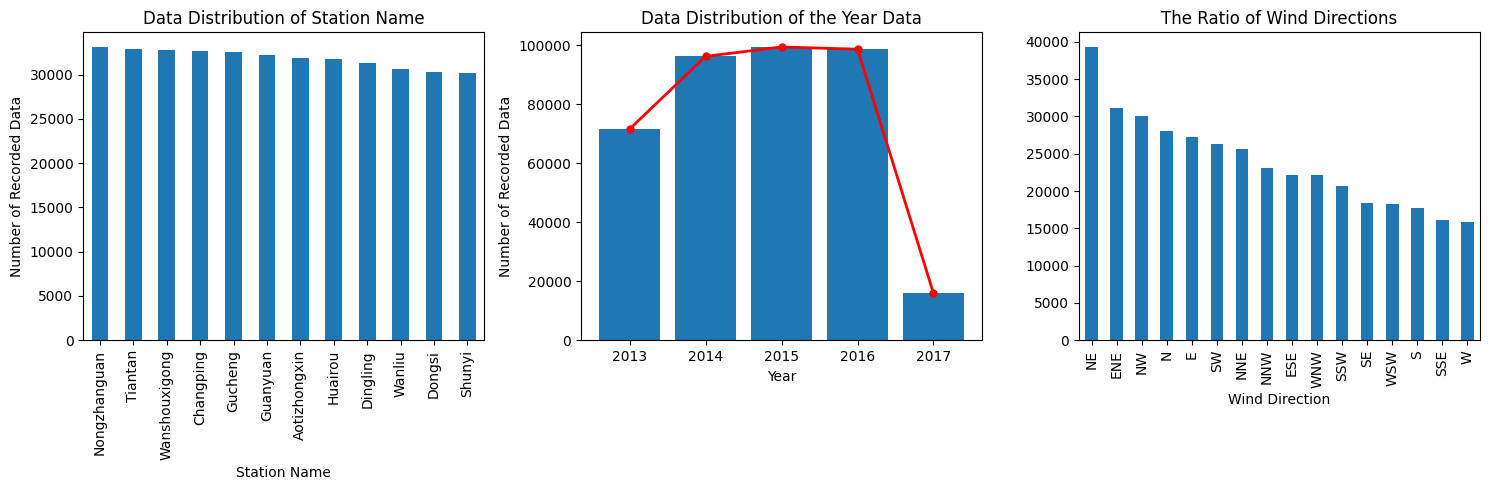

In [ ]:
temp_df1 = clean_df['year'].value_counts().reset_index().sort_values('year')

plt.figure(figsize=(15,5))

plt.subplot(131)
clean_df['station'].value_counts().plot(kind='bar')
plt.title('Data Distribution of Station Name')
plt.xlabel('Station Name')
plt.ylabel('Number of Recorded Data')

plt.subplot(132)
plt.bar(temp_df1['year'], temp_df1['count']) 
plt.plot(temp_df1['year'], temp_df1['count'], linewidth=2, color='red', marker='o', markersize=5)
plt.title('Data Distribution of the Year Data')
plt.xlabel('Year')
plt.ylabel('Number of Recorded Data')

plt.subplot(133)
clean_df['wd'].value_counts().plot(kind='bar')
plt.title('The Distribution of Wind Directions')
plt.xlabel('Wind Direction')

plt.tight_layout()
plt.show()

**Insight:**
- From the Station Name Data Distribution, it is clear that Shunyi Station has the least number of data records. While Nongzhanguan Station has the highest number of data records.
- From the Year Data Distribution Visualization, data recording has increased from 2013 to 2015. Then, data recording decreased in 2016 and decreased significantly in 2017.
- In the 5-year period, the wind blowing from the NorthEast is the most frequent wind.

## Visualization & Explanatory Analysis

### Question 1 : How the average monthly pollutant change in particular year at particular station name?

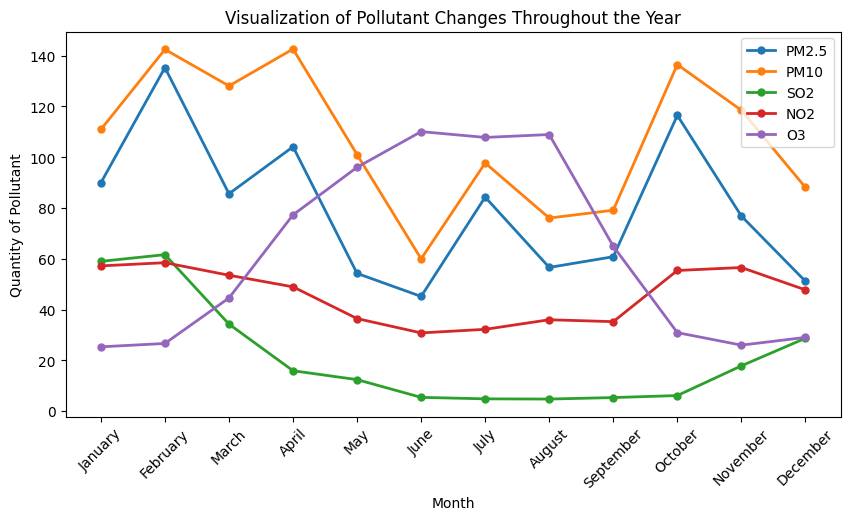

In [15]:
group_df = clean_df.groupby(by=['station','year','month']).agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',         # Using manual grouping method by station, year, and month 
    'NO2' : 'mean',
    'O3' : 'mean'
})

monthEncoder = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}

res_df = group_df.loc[('Changping',2014)]   # For example, Chanping Station in year 2014
colors = sns.color_palette("tab10", 6)

plt.figure(figsize=(10,5))
for ii, i in enumerate(res_df.columns):
    plt.plot(res_df.index.map(monthEncoder), res_df[i], label=i, linewidth=2, color=colors[ii], marker='o', markersize=5)
    plt.xticks(rotation=45)

plt.title('Visualization of Pollutant Changes Throughout the Year')
plt.xlabel('Month')
plt.ylabel('Quantity of Pollutant')
plt.legend()
plt.show()

**Insight**
- At Changping Station, throughout 2014, the visualization of pollutant changes is shown in the figure above.
- It can be seen that PM10 and PM2.5 pollutants have consistent average values throughout the year. PM10 is always higher than PM2.5. Every time PM10 decreased, PM2.5 also decreased.
- This is also the same for NO2 and SO2 pollutants. For most of the year, SO2 pollutants have lower values than NO2 pollutants.
- On the other hand, the reverse values occur for O3, NO2, and SO2. Every time the O3 trend increases, the NO2 and SO2 trends decrease. And vice versa.
- By changing the parameters in the code, you can see the change of <u>the average pollutant change for 1 year</u>, <u>the name of the affected station</u>, and <u>what year the data was recorded</u> dynamically.

### Question 2 : What is the correlation between temperature change and CO pollutant at particular station name in particular year?

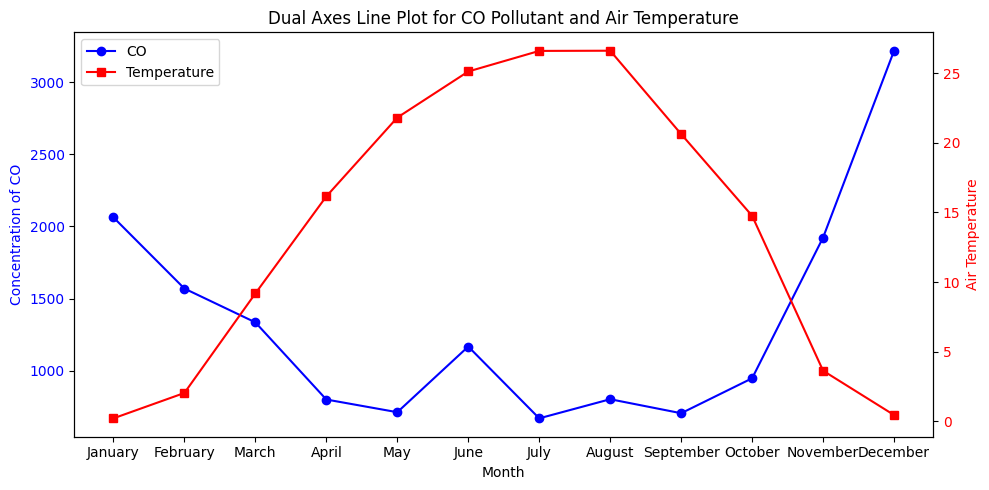

In [16]:
group_df = clean_df.groupby(by=['station','year','month']).agg({
    'CO' : 'mean',      #  Using manual grouping method by station, year, and month 
    'TEMP' : 'mean'
})

monthEncoder = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}

res_df = group_df.loc[('Gucheng',2015)] # For example, Gucheng Station in year 2015
fig, ax1 = plt.subplots(figsize=(10, 5))

# First plot is used for the visualization of CO pollutant concentration
ax1.plot(res_df.index.map(monthEncoder), res_df['CO'], color='b', marker='o', label='CO')
ax1.set_ylabel('Concentration of CO', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Second plot is used for the visualization of Air Temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Air Temperature', color='r')
ax2.plot(res_df.index.map(monthEncoder), res_df['TEMP'], color='r', marker='s', label='Temperature')
ax2.tick_params(axis='y', labelcolor='r')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.set_xlabel('Month')
plt.title('Dual Axes Line Plot for CO Pollutant and Air Temperature')
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
fig.tight_layout()
plt.show()

**Insight**
- As can be seen from the visualization, at Gucheng Station during 2015 the trend of CO and air temperature has an inverse pattern. When the air temperature is high, the CO in the air is low. Meanwhile, when the air temperature level is low, the CO level in the air is high.
- By changing the parameters in the code, we can see the relationship between <u>CO and air temperature</u>, <u>the name of the affected station</u>, and <u>what year the data was recorded</u> change dynamically.

### Question 3 : How does wind direction affect pollutants at particular station name in particular year?

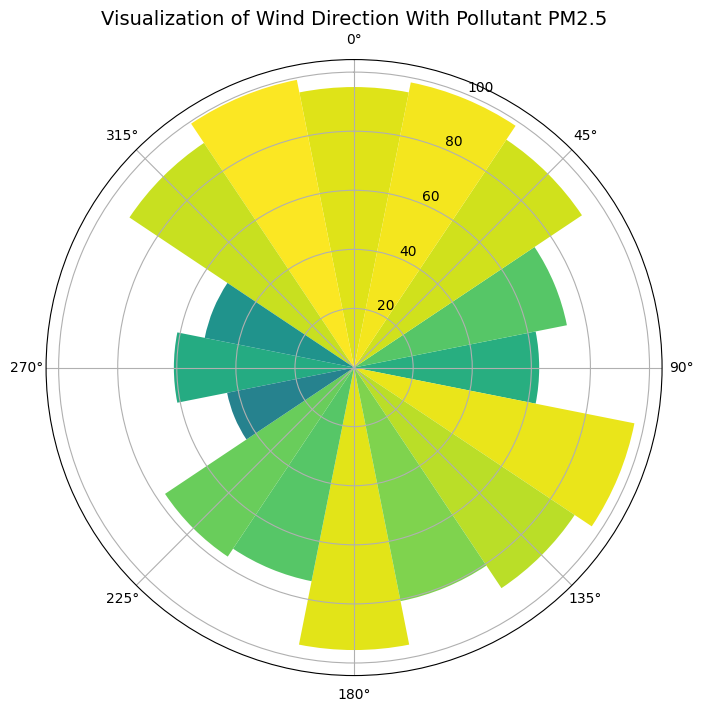

In [17]:
wind_degrees_dict = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

desired_order = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

group_df = clean_df.groupby(by=['station','year', 'wd']).agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',    # Using manual grouping method by station, year, and wind direction 
    'SO2' : 'mean',    
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean'
})

series = group_df.loc[('Aotizhongxin',2013)]['PM2.5'] # For example, Aotizhongxin Stasiun in year 2013
pm25_concentrations = series[desired_order].values
wind_directions = series.index.map(wind_degrees_dict)
wind_directions_rad = np.deg2rad(wind_directions)

# Redial Bar Chart is being used to see the source of the pollutant
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(wind_directions_rad, pm25_concentrations, width=np.pi/8, color=plt.cm.viridis(pm25_concentrations / 100))

ax.set_title("Visualization of Wind Direction With Pollutant PM2.5", fontsize=14)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.show()

**Insight:**
- 0&#176; signifies North. 90&#176; signifies East. 180&#176; signifies South. 270&#170; indicates West.
- It can be seen that PM2.5 particles at **Aotizhongxin Station**, in the year **2013** on average, were more often carried by winds coming from the directions of <u>Northwest to Northeast</u>, <u>Southeast</u>, and <u>South</u>.
- By changing the parameters in the code, it is possible to see what and how much of the average <u>wind-borne substance</u>, <u>the name of the affected station</u>, and <u>what year the data was recorded</u> change dynamically.


## Further Analysis

### Clustering (Without Machine Learning Algorithm, Binning)

In [18]:
# Hours binning
# Night: 0-5; Morning: 6-11; Afternoon: 12-17; Evening: 18-23

bins = [-1, 5, 11, 17, 23]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

clean_df['time_of_day'] = pd.cut(clean_df['hour'], bins=bins, labels=labels)
clean_df[['hour', 'time_of_day']].sample(10)

,hour,time_of_day
201474,18,Evening
397086,6,Morning
176231,23,Evening
109336,16,Afternoon
230693,5,Night
251312,8,Morning
43291,19,Evening
333970,10,Morning
121715,11,Morning
342452,20,Evening


In [ ]:
# clean_df.to_csv('./dataset/cleanBinnedMainDataset.csv', index=False)

### Why binning the data?

**Simplify complex data** - Instead of analyzing 24 hourly values, grouping into 4 bins gives clearer, more interpretable trends. Also, it makes easier to explain results to non-technical audiences.

### Question 4 : How does average pollutant concentration by time of day at particular station name in particular year?

In [19]:
group_df = clean_df.groupby(by=['station','year', 'time_of_day']).agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',    # Using manual grouping method by station, year, and wind direction 
    'SO2' : 'mean',    
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean'
})
res_df = group_df.loc[('Aotizhongxin',2014)] # For example, Aotizhongxin Station in year 2014
res_df

,PM2.5,PM10,SO2,NO2,CO,O3
time_of_day,,,,,,
Night,95.641844,129.246606,19.568541,73.358612,1291.691996,23.120821
Morning,87.863325,113.726303,22.445112,64.755931,1240.893300,27.219206
Afternoon,84.193124,109.065217,23.023256,48.056623,1017.997978,88.022245
Evening,93.093781,134.687068,20.300247,70.739783,1195.656466,59.122853


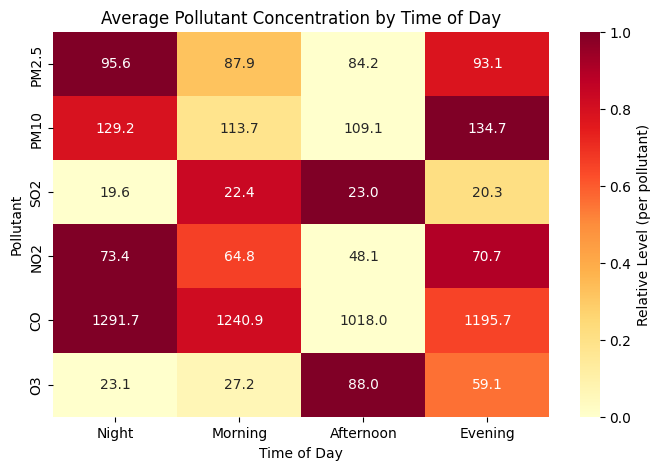

In [20]:
df_T = res_df.T  

# Normalization per row for easier understanding visualization
df_norm = df_T.sub(df_T.min(axis=1), axis=0)
df_norm = df_norm.div(df_T.max(axis=1) - df_T.min(axis=1), axis=0)

plt.figure(figsize=(8,5))
sns.heatmap(df_norm, 
            annot=df_T, fmt=".1f", cmap="YlOrRd", 
            cbar_kws={'label': 'Relative Level (per pollutant)'})

plt.title("Average Pollutant Concentration by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Pollutant")
plt.show()

**Insigh**
- As can be seen from the visualization, at Aotizhongxin Station in 2014, the average pollutant concentration by time of day can be seen above.
- It shows that overall, Night time relatively is the dirtiest air quality throughout 2014 because there are 3 pollutants that reach each maximum concentration value: CO, NO2, and PM2.5.
- While Afternoon relatively is the least dirty air quality throughout 2014 because 4 out of 6 pollutants has lowest concentration value: CO, NO2, PM10, and PM2.5.
- By changing the parameters in the code, you can see the change of <u>the average pollutant concentration in certain day time for 1 year</u>, <u>the name of the affected station</u>, and <u>what year the data was recorded</u> dynamically.

## Conclusion

| **Weather** | **Starting Month** | **Ending Month** |
|-------------|--------------------|------------------|
| Spring      | April              | May              |
| Summer      | June               | August           |
| Autumn      | September          | October          |
| Winter      | November           | March            |

If linked to the seasonal conditions in China, then:
- Visualization & Explanatory Analysis Figure 1:
    - At Changping Station in 2014, PM2.5, PM10, SO2, NO2 pollutants decreased and O3 pollutants increased during Spring to Autumn.
- Visualization & Explanatory Analysis Figure 2:
    - According to the season, at Gucheng Station in 2015, the highest temperature occurred in Summer, from July to August. While the lowest temperature occurred in the Winter season, from December to January.
    - During this time, CO levels in the air experienced inverse values. The highest CO levels occurred in the cold season, from December to January, and the lowest CO levels occurred in the hot season.
- Visualization & Explanatory Analysis Figure 3:
    - The highest levels of PM2.5 pollutants at Aotizhongxin Station in 2013 were carried by winds blowing from the Northwest to the Northeast, Southeast, and South. Therefore, it is good to try to check the conditions of the area where the wind comes from.
- Visualization & Explanatory Analysis Figure 4:
    - Because Figure 4 using "day" timeframe, it is not suitable to linked it with weather in Chine. However, from the visualization, we may imply that air quality become worse every time people go to work. The air quality restored better until Afternoon, but become worse when people go back from work everyday. 